In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from catboost import CatBoostClassifier, Pool


import pickle

In [2]:
epl23 = pd.read_csv(r'C:\Users\Ayodele\Desktop\epl\E0.csv')
epl23.head(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/2023,20:00,Burnley,Man City,0,3,A,0,2,...,2.28,1.50,1.95,1.98,1.95,1.97,NaN,NaN,1.92,1.95
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,2.63,-2.00,1.95,1.98,1.93,1.97,2.01,2.09,1.95,1.92
2,E0,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,2.12,0.00,2.02,1.91,2.01,1.92,2.06,1.96,1.96,1.91
3,E0,12/08/2023,15:00,Brighton,Luton,4,1,H,1,0,...,2.48,-1.75,2.01,1.92,2.00,1.91,2.14,1.93,2.00,1.86
4,E0,12/08/2023,15:00,Everton,Fulham,0,1,A,0,0,...,1.71,-0.25,2.06,1.87,2.04,1.88,2.08,1.99,1.98,1.88
5,E0,12/08/2023,15:00,Sheffield United,Crystal Palace,0,1,A,0,0,...,1.53,0.25,2.10,1.83,2.10,1.84,2.12,1.86,2.05,1.83
6,E0,12/08/2023,17:30,Newcastle,Aston Villa,5,1,H,2,1,...,2.22,-0.75,1.84,2.09,1.85,2.09,1.87,2.13,1.82,2.06
7,E0,13/08/2023,14:00,Brentford,Tottenham,2,2,D,2,2,...,2.15,0.00,1.88,2.02,1.89,2.03,1.95,2.05,1.89,1.98
8,E0,13/08/2023,16:30,Chelsea,Liverpool,1,1,D,1,1,...,2.52,0.25,1.98,1.92,2.00,1.93,2.03,2.08,1.91,1.96
9,E0,14/08/2023,20:00,Man United,Wolves,1,0,H,0,0,...,2.37,-1.50,1.80,2.00,1.82,2.08,1.88,2.14,1.82,2.05


In [3]:
epl23.shape

(380, 106)

In [4]:
epl22 = pd.read_csv(r'C:\Users\Ayodele\Desktop\epl\E0 (1).csv')
epl22.head(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,1.76,0.50,2.09,1.84,2.04,1.88,2.09,1.88,2.03,1.85
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,2.73,1.75,1.90,2.03,1.91,2.02,2.01,2.06,1.89,1.99
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,1.76,0.50,1.93,2.00,1.93,2.00,1.94,2.04,1.88,2.00
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,...,1.87,-0.25,2.08,1.85,2.10,1.84,2.14,1.87,2.08,1.81
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,0,0,...,1.89,-1.00,1.97,1.96,1.99,1.93,2.19,1.97,2.03,1.86
5,E0,06/08/2022,15:00,Tottenham,Southampton,4,1,H,2,1,...,2.31,-1.50,2.07,1.86,2.04,1.88,2.08,1.88,2.03,1.85
6,E0,06/08/2022,17:30,Everton,Chelsea,0,1,A,0,1,...,1.77,1.00,1.93,2.00,1.94,1.98,1.94,2.11,1.88,2.00
7,E0,07/08/2022,14:00,Leicester,Brentford,2,2,D,1,0,...,1.97,-0.50,1.94,1.99,1.96,1.96,1.96,2.04,1.92,1.96
8,E0,07/08/2022,14:00,Man United,Brighton,1,2,A,0,2,...,1.94,-0.75,2.06,1.87,2.05,1.88,2.08,1.97,2.00,1.88
9,E0,07/08/2022,16:30,West Ham,Man City,0,2,A,0,1,...,2.62,1.50,1.85,2.08,1.85,2.08,2.00,2.12,1.85,2.04


In [5]:
epl21 = pd.read_csv(r'C:\Users\Ayodele\Desktop\epl\E0 (2).csv')
epl21.head(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86
5,E0,14/08/2021,15:00,Leicester,Wolves,1,0,H,1,0,...,1.79,-0.75,2.02,1.91,2.01,1.92,2.05,1.95,1.99,1.89
6,E0,14/08/2021,15:00,Watford,Aston Villa,3,2,H,2,0,...,1.74,0.25,2.02,1.91,2.04,1.89,2.04,1.93,1.99,1.90
7,E0,14/08/2021,17:30,Norwich,Liverpool,0,3,A,0,1,...,2.48,1.25,1.85,2.08,1.85,2.09,2.03,2.10,1.88,2.01
8,E0,15/08/2021,14:00,Newcastle,West Ham,2,4,A,2,1,...,1.95,0.25,2.01,1.92,2.02,1.91,2.12,1.94,2.00,1.89
9,E0,15/08/2021,16:30,Tottenham,Man City,1,0,H,0,0,...,1.99,1.00,1.84,2.09,1.87,2.06,1.94,2.15,1.84,2.05


In [6]:
epl20 = pd.read_csv(r'C:\Users\Ayodele\Desktop\epl\E0 (3).csv')
epl20.head(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97
5,E0,13/09/2020,16:30,Tottenham,Everton,0,1,A,0,0,...,1.79,-0.50,2.09,1.81,2.09,1.85,2.16,1.86,2.08,1.81
6,E0,14/09/2020,20:15,Brighton,Chelsea,1,3,A,0,1,...,2.17,1.00,1.93,1.97,1.94,1.98,2.02,2.02,1.93,1.95
7,E0,14/09/2020,18:00,Sheffield United,Wolves,0,2,A,0,2,...,1.39,0.25,1.70,2.10,1.74,2.23,1.86,2.28,1.74,2.18
8,E0,19/09/2020,12:30,Everton,West Brom,5,2,H,2,1,...,1.85,-1.00,2.09,1.81,2.14,1.82,2.15,1.90,2.06,1.83
9,E0,19/09/2020,15:00,Leeds,Fulham,4,3,H,2,1,...,1.88,-0.75,1.97,1.93,1.99,1.94,2.01,2.03,1.95,1.93


In [7]:
epl19 = pd.read_csv(r'C:\Users\Ayodele\Desktop\epl\E0 (4).csv')
epl19.head(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93
5,E0,10/08/2019,15:00,Watford,Brighton,0,3,A,0,1,...,1.73,-0.50,2.04,1.86,2.05,1.88,2.12,1.91,2.05,1.84
6,E0,10/08/2019,17:30,Tottenham,Aston Villa,3,1,H,0,1,...,2.40,-1.50,2.10,1.70,2.18,1.77,2.21,1.87,2.08,1.80
7,E0,11/08/2019,14:00,Leicester,Wolves,0,0,D,0,0,...,1.62,-0.25,2.07,1.83,2.11,1.83,2.12,1.98,2.06,1.84
8,E0,11/08/2019,14:00,Newcastle,Arsenal,0,1,A,0,0,...,2.05,0.25,1.99,1.91,1.99,1.95,2.17,1.97,2.00,1.89
9,E0,11/08/2019,16:30,Man United,Chelsea,4,0,H,1,0,...,1.84,-0.50,2.02,1.88,2.04,1.90,2.10,1.91,2.04,1.85


In [8]:
epl1 = pd.concat([epl23, epl22, epl21, epl20, epl19], axis = 0)
epl1.reset_index(drop = True)
epl1.head(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/2023,20:00,Burnley,Man City,0,3,A,0,2,...,2.28,1.50,1.95,1.98,1.95,1.97,NaN,NaN,1.92,1.95
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,2.63,-2.00,1.95,1.98,1.93,1.97,2.01,2.09,1.95,1.92
2,E0,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,2.12,0.00,2.02,1.91,2.01,1.92,2.06,1.96,1.96,1.91
3,E0,12/08/2023,15:00,Brighton,Luton,4,1,H,1,0,...,2.48,-1.75,2.01,1.92,2.00,1.91,2.14,1.93,2.00,1.86
4,E0,12/08/2023,15:00,Everton,Fulham,0,1,A,0,0,...,1.71,-0.25,2.06,1.87,2.04,1.88,2.08,1.99,1.98,1.88
5,E0,12/08/2023,15:00,Sheffield United,Crystal Palace,0,1,A,0,0,...,1.53,0.25,2.10,1.83,2.10,1.84,2.12,1.86,2.05,1.83
6,E0,12/08/2023,17:30,Newcastle,Aston Villa,5,1,H,2,1,...,2.22,-0.75,1.84,2.09,1.85,2.09,1.87,2.13,1.82,2.06
7,E0,13/08/2023,14:00,Brentford,Tottenham,2,2,D,2,2,...,2.15,0.00,1.88,2.02,1.89,2.03,1.95,2.05,1.89,1.98
8,E0,13/08/2023,16:30,Chelsea,Liverpool,1,1,D,1,1,...,2.52,0.25,1.98,1.92,2.00,1.93,2.03,2.08,1.91,1.96
9,E0,14/08/2023,20:00,Man United,Wolves,1,0,H,0,0,...,2.37,-1.50,1.80,2.00,1.82,2.08,1.88,2.14,1.82,2.05


In [9]:
epl1.shape

(1900, 106)

In [10]:
epl1.isna().sum()

Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
           ..
PCAHA       0
MaxCAHH     1
MaxCAHA     1
AvgCAHH     0
AvgCAHA     0
Length: 106, dtype: int64

In [11]:
epl2 = epl1.dropna()
epl2.shape

(1699, 106)

In [12]:
epl2.dtypes

Div          object
Date         object
Time         object
HomeTeam     object
AwayTeam     object
             ...   
PCAHA       float64
MaxCAHH     float64
MaxCAHA     float64
AvgCAHH     float64
AvgCAHA     float64
Length: 106, dtype: object

In [13]:
epl2.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

In [14]:
epl2['Date'] = pd.to_datetime(epl2['Date'], dayfirst = True)
epl2['Date'] = epl2['Date'].dt.strftime('%Y')
epl2.head()

<ipython-input-14-f864177178c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epl2['Date'] = pd.to_datetime(epl2['Date'], dayfirst = True)
<ipython-input-14-f864177178c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epl2['Date'] = epl2['Date'].dt.strftime('%Y')


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
1,E0,2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,2.63,-2.00,1.95,1.98,1.93,1.97,2.01,2.09,1.95,1.92
2,E0,2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,2.12,0.00,2.02,1.91,2.01,1.92,2.06,1.96,1.96,1.91
3,E0,2023,15:00,Brighton,Luton,4,1,H,1,0,...,2.48,-1.75,2.01,1.92,2.00,1.91,2.14,1.93,2.00,1.86
4,E0,2023,15:00,Everton,Fulham,0,1,A,0,0,...,1.71,-0.25,2.06,1.87,2.04,1.88,2.08,1.99,1.98,1.88
5,E0,2023,15:00,Sheffield United,Crystal Palace,0,1,A,0,0,...,1.53,0.25,2.10,1.83,2.10,1.84,2.12,1.86,2.05,1.83


In [15]:
epl2['Date'].value_counts()

Date
2021    407
2023    399
2022    356
2020    336
2019    199
2024      2
Name: count, dtype: int64

In [16]:
epl3 = epl2.iloc[:, [1,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23]]
epl3.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
1,2023,Arsenal,Nott'm Forest,2,1,H,2,0,H,15,...,7,2,12,12,8,3,2,2,0,0
2,2023,Bournemouth,West Ham,1,1,D,0,0,D,14,...,5,3,9,14,10,4,1,4,0,0
3,2023,Brighton,Luton,4,1,H,1,0,H,27,...,12,3,11,12,6,7,2,2,0,0
4,2023,Everton,Fulham,0,1,A,0,0,D,19,...,9,2,12,6,10,4,0,2,0,0
5,2023,Sheffield United,Crystal Palace,0,1,A,0,0,D,8,...,1,8,18,11,5,5,3,0,0,0


In [17]:
epl3.dtypes

Date        object
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR         object
HTHG         int64
HTAG         int64
HTR         object
HS           int64
AS           int64
HST          int64
AST          int64
HF           int64
AF           int64
HC           int64
AC           int64
HY           int64
AY           int64
HR           int64
AR           int64
dtype: object

In [18]:
epl3.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY',
       'HR', 'AR'],
      dtype='object')

In [19]:
epl3['FTR'].unique()

array(['H', 'D', 'A'], dtype=object)

In [20]:
epl3['FTR'].value_counts()

FTR
H    752
A    564
D    383
Name: count, dtype: int64

In [21]:
epl3c = epl3.copy()
oe = OneHotEncoder(sparse = False)
epl3c['FTR'] = oe.fit_transform(np.array(epl3c['FTR']).reshape(-1, 1))
epl3c.head() #H and D = 1, A = 0

c:\Users\Ayodele\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
1,2023,Arsenal,Nott'm Forest,2,1,0.0,2,0,H,15,...,7,2,12,12,8,3,2,2,0,0
2,2023,Bournemouth,West Ham,1,1,0.0,0,0,D,14,...,5,3,9,14,10,4,1,4,0,0
3,2023,Brighton,Luton,4,1,0.0,1,0,H,27,...,12,3,11,12,6,7,2,2,0,0
4,2023,Everton,Fulham,0,1,1.0,0,0,D,19,...,9,2,12,6,10,4,0,2,0,0
5,2023,Sheffield United,Crystal Palace,0,1,1.0,0,0,D,8,...,1,8,18,11,5,5,3,0,0,0


In [22]:
epl3c['FTR'].value_counts()

FTR
0.0    1135
1.0     564
Name: count, dtype: int64

In [23]:
epl3c['Date'] = epl3['Date'].astype('int')
epl3c.dtypes

Date          int32
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR         float64
HTHG          int64
HTAG          int64
HTR          object
HS            int64
AS            int64
HST           int64
AST           int64
HF            int64
AF            int64
HC            int64
AC            int64
HY            int64
AY            int64
HR            int64
AR            int64
dtype: object

In [24]:
epl3c.shape

(1699, 21)

In [25]:
epl4 = epl3c.drop(columns = ['HomeTeam', 'AwayTeam', 'Date', 'FTAG', 'FTHG', 'HTR', 'HTAG', 'HTHG' ], axis = 1)
epl4.head().reset_index(drop = True)

,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0.0,15,6,7,2,12,12,8,3,2,2,0,0
1,0.0,14,16,5,3,9,14,10,4,1,4,0,0
2,0.0,27,9,12,3,11,12,6,7,2,2,0,0
3,1.0,19,9,9,2,12,6,10,4,0,2,0,0
4,1.0,8,24,1,8,18,11,5,5,3,0,0,0


In [26]:
y = epl4['FTR']
x = epl4.copy()
x = x.drop('FTR', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, stratify = y_train, random_state = 42)

In [27]:
#ANALYZING WITH LOGISTIC REGRESSION MODEL
lg = LogisticRegression(random_state = 42).fit(x_train, y_train)

c:\Users\Ayodele\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
lg.coef_

array([[ 0.02971601, -0.03325517, -0.47300347,  0.50899317, -0.00870236,
        -0.0065362 ,  0.06590224, -0.08892131, -0.02388859, -0.01189891,
         0.32439533, -0.62084217]])

In [29]:
lg.intercept_

array([-0.57774018])

In [30]:
y_predlg = lg.predict(x_val)

In [31]:
lg_prob = lg.predict_proba(x_val)

In [32]:
lg_df = pd.DataFrame(lg_prob, columns = ['HomeWinProbability', 'AwayWinProbability'])

In [33]:
lg_df['HomeTeam'] = pd.Series(epl3c.loc[x_val.index, 'HomeTeam'].values)
lg_df['AwayTeam'] = pd.Series(epl3c.loc[x_val.index, 'AwayTeam'].values)

In [34]:
lg_df = lg_df[['HomeTeam', 'AwayTeam', 'HomeWinProbability', 'AwayWinProbability']]
lg_df.head(10)

,HomeTeam,AwayTeam,HomeWinProbability,AwayWinProbability
0,Aston Villa,Arsenal,0.134266,0.865734
1,Leeds,Man City,0.560718,0.439282
2,Burnley,West Ham,0.773130,0.226870
3,Everton,West Ham,0.289945,0.710055
4,Aston Villa,Leicester,0.798963,0.201037
5,Luton,Burnley,0.575483,0.424517
6,Crystal Palace,Chelsea,0.873190,0.126810
7,Liverpool,Man City,0.211491,0.788509
8,Southampton,Newcastle,0.995478,0.004522
9,Man United,Arsenal,0.243500,0.756500


In [35]:
print('accuracry score is: ', '%.4f' %accuracy_score(y_val, y_predlg))
print('precision score is: ', '%.4f' %precision_score(y_val, y_predlg))
print('f1 score is: ', '%.4f' %f1_score(y_val, y_predlg))
print('recall score is: ', '%.4f' %recall_score(y_val, y_predlg))
lg_pos = lg.predict_proba(x_val)[:, 1]
print('auc score is:', '%.4f' %roc_auc_score(y_val, lg_pos))

accuracry score is:  0.7610
precision score is:  0.6712
f1 score is:  0.6012
recall score is:  0.5444
auc score is: 0.8213


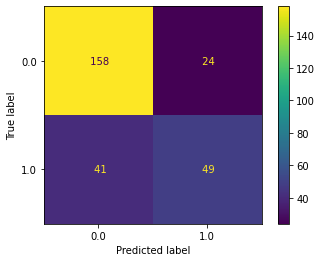

In [36]:
cm = confusion_matrix(y_val, y_predlg, labels = lg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lg.classes_)
disp.plot(values_format = ' ')

In [37]:
#ANALYZING WITH DECISION TREES
dt = DecisionTreeClassifier(random_state = 42).fit(x_train, y_train)

In [38]:
dt_pred = dt.predict(x_val)

In [39]:
print('accuracry score is: ', '%.4f' %accuracy_score(y_val, dt_pred))
print('precision score is: ', '%.4f' %precision_score(y_val, dt_pred))
print('f1 score is: ', '%.4f' %f1_score(y_val, dt_pred))
print('recall score is: ', '%.4f' %recall_score(y_val, dt_pred))

accuracry score is:  1.0000
precision score is:  1.0000
f1 score is:  1.0000
recall score is:  1.0000


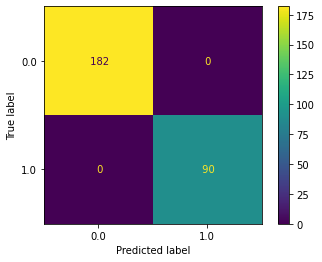

In [40]:
cm = confusion_matrix(y_val, dt_pred, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot(values_format = ' ')

[Text(0.5, 0.9, 'AST <= 4.5\ngini = 0.443\nsamples = 1359\nvalue = [908, 451]\nclass = WIN'),
 Text(0.25, 0.7, 'HST <= 2.5\ngini = 0.315\nsamples = 842\nvalue = [677, 165]\nclass = WIN'),
 Text(0.125, 0.5, 'AST <= 1.5\ngini = 0.498\nsamples = 139\nvalue = [74, 65]\nclass = WIN'),
 Text(0.0625, 0.3, 'AS <= 2.5\ngini = 0.105\nsamples = 18\nvalue = [17, 1]\nclass = WIN'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'AC <= 4.5\ngini = 0.498\nsamples = 121\nvalue = [57, 64]\nclass = NON-WIN'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'HST <= 5.5\ngini = 0.244\nsamples = 703\nvalue = [603, 100]\nclass = WIN'),
 Text(0.3125, 0.3, 'AST <= 3.5\ngini = 0.328\nsamples = 363\nvalue = [288, 75]\nclass = WIN'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'AY <= 5.5\ngini = 0.136\nsamples = 340\nvalue = [315, 25]\nclass = WIN'),
 Text(0.40625, 0.1,

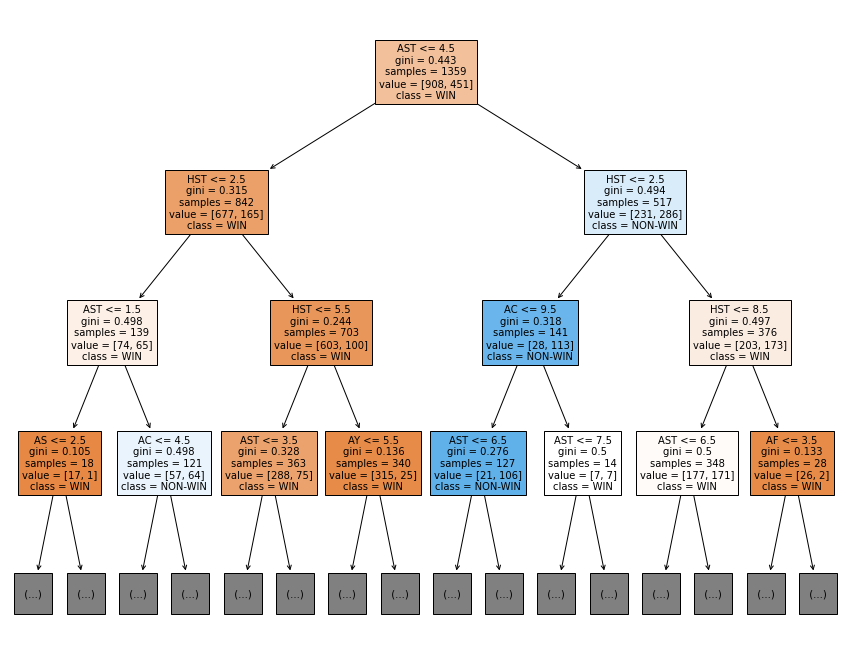

In [41]:
plt.figure(figsize = (15,12))
plot_tree(dt, max_depth = 3, fontsize = 10, feature_names = x.columns, class_names = {0:'WIN', 1:'NON-WIN'}, filled = True)

In [46]:
%%time
#HYPERPARAMETER TUNING
param = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
        'min_samples_leaf':[2,3,4,5,6,7,8,9, 10, 15, 20, 50]
        }
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}
tuned_dt = DecisionTreeClassifier(random_state = 42)

lg1 = GridSearchCV(tuned_dt,
                  param,
                  scoring = scoring,
                  cv = 5,
                  refit = 'f1')
lg1.fit(x_train, y_train)

Wall time: 59.7 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [47]:
path = r'C:\Users\Ayodele\Desktop\epl\ '
#pickle.dump(lg1, open(path + 'dt_model', 'wb'))

In [48]:
dtcv = pickle.load(open(path + 'dt_model', 'rb'))

In [49]:
dt1_pred = dtcv.predict(x_val)
print('accuracry score is: ', '%.4f' %accuracy_score(y_val, dt1_pred))
print('precision score is: ', '%.4f' %precision_score(y_val, dt1_pred))
print('f1 score is: ', '%.4f' %f1_score(y_val, dt1_pred))
print('recall score is: ', '%.4f' %recall_score(y_val, dt1_pred))
dt_pos = lg1.predict_proba(x_val)[:, 1]
print('auc score is:', '%.4f' %roc_auc_score(y_val, dt_pos))

accuracry score is:  0.2316
precision score is:  0.1917
f1 score is:  0.2615
recall score is:  0.4111
auc score is: 0.6628


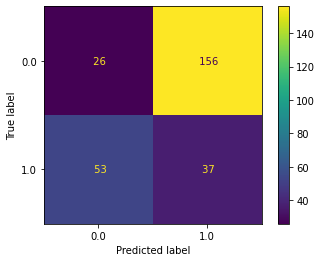

In [91]:
cm = confusion_matrix(y_val, dt1_pred, labels = dtcv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot(values_format = ' ')

In [51]:
lg1.best_params_

{'max_depth': 1, 'min_samples_leaf': 2}

In [52]:
lg1.best_estimator_

DecisionTreeClassifier(max_depth=1, min_samples_leaf=2, random_state=42)

In [53]:
dt_prob = lg1.predict_proba(x_val)

In [54]:
dt_df = pd.DataFrame(dt_prob, columns = ['HomeWinProbability', 'AwayWinProbability'])

In [55]:
dt_df['HomeTeam'] = pd.Series(epl3c.loc[x_val.index, 'HomeTeam'].values)
dt_df['AwayTeam'] = pd.Series(epl3c.loc[x_val.index, 'AwayTeam'].values)

In [56]:
dt_df = dt_df[['HomeTeam', 'AwayTeam', 'HomeWinProbability', 'AwayWinProbability']]
dt_df.head(10)

,HomeTeam,AwayTeam,HomeWinProbability,AwayWinProbability
0,Aston Villa,Arsenal,0.446809,0.553191
1,Leeds,Man City,0.804038,0.195962
2,Burnley,West Ham,0.804038,0.195962
3,Everton,West Ham,0.446809,0.553191
4,Aston Villa,Leicester,0.804038,0.195962
5,Luton,Burnley,0.804038,0.195962
6,Crystal Palace,Chelsea,0.804038,0.195962
7,Liverpool,Man City,0.446809,0.553191
8,Southampton,Newcastle,0.804038,0.195962
9,Man United,Arsenal,0.446809,0.553191


In [57]:
print('best avg. score: ', '%.4f' %lg1.best_score_)
print('highest mean test f1: ', '%.4f' %lg1.cv_results_['mean_test_f1'].max())
print('highest mean test recall: ', '%.4f' %lg1.cv_results_['mean_test_recall'].max())
print('highest mean test precision: ', '%.4f' %lg1.cv_results_['mean_test_precision'].max())
print('highest mean test accuracy: ', '%.4f' %lg1.cv_results_['mean_test_accuracy'].max())

best avg. score:  0.5663
highest mean test f1:  0.5663
highest mean test recall:  0.5852
highest mean test precision:  0.7130
highest mean test accuracy:  0.7417


In [58]:
%%time
#ANALYZING USING RANDOM FOREST
rf = RandomForestClassifier(random_state = 42)

params = {'max_depth': [2,3,4,5, None],
          'min_samples_leaf': [2,3,5],
          'min_samples_split': [3,5,7,10],
          'max_features': [2,3,4,5,7],
          'n_estimators': [50,75,100,125,150]
         }

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

rfcv = GridSearchCV(rf, params, scoring = scoring, cv = 5, refit = 'f1')

#rfcv.fit(x_train, y_train)

Wall time: 0 ns


In [59]:
path = r'C:\Users\Ayodele\Desktop\epl\ '
#pickle.dump(rfcv, open(path + 'rfcv_model', 'wb'))

In [60]:
rfcv = pickle.load(open(path + 'rfcv_model', 'rb'))

In [61]:
rfcv.best_params_

{'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}

In [62]:
rfcv.best_score_

0.8355855745080601

In [63]:
rfcv_pred = rfcv.predict(x_val)
print('accuracry score is: ', '%.4f' %accuracy_score(y_val, rfcv_pred))
print('precision score is: ', '%.4f' %precision_score(y_val, rfcv_pred))
print('f1 score is: ', '%.4f' %f1_score(y_val, rfcv_pred))
print('recall score is: ', '%.4f' %recall_score(y_val, rfcv_pred))
rfcv_pos = rfcv.predict_proba(x_val)[:, 1]
print('auc score is:', '%.4f' %roc_auc_score(y_val, rfcv_pos))

accuracry score is:  0.1140
precision score is:  0.1128
f1 score is:  0.1544
recall score is:  0.2444
auc score is: 0.0403


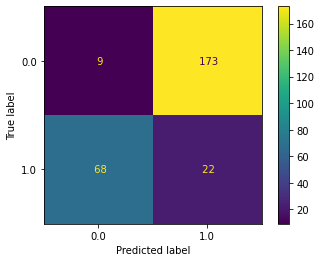

In [64]:
cm = confusion_matrix(y_val, rfcv_pred, labels = rfcv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfcv.classes_)
disp.plot(values_format = ' ')

In [65]:
print('best avg. score: ', '%.4f' %rfcv.best_score_)
print('highest mean test f1: ', '%.4f' %rfcv.cv_results_['mean_test_f1'].max())
print('highest mean test recall: ', '%.4f' %rfcv.cv_results_['mean_test_recall'].max())
print('highest mean test precision: ', '%.4f' %rfcv.cv_results_['mean_test_precision'].max())
print('highest mean test accuracy: ', '%.4f' %rfcv.cv_results_['mean_test_accuracy'].max())

best avg. score:  0.8356
highest mean test f1:  0.8356
highest mean test recall:  0.9846
highest mean test precision:  0.7821
highest mean test accuracy:  0.7631


In [66]:
rfcv.best_estimator_

RandomForestClassifier(max_features=3, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50, random_state=42)

In [67]:
rfcv_prob = rfcv.predict_proba(x_val)

rfcv_df = pd.DataFrame(rfcv_prob, columns = ['HomeWinProbability', 'AwayWinProbability'])

rfcv_df['HomeTeam'] = pd.Series(epl3c.loc[x_val.index, 'HomeTeam'].values)
rfcv_df['AwayTeam'] = pd.Series(epl3c.loc[x_val.index, 'AwayTeam'].values)

rfcv_df = rfcv_df[['HomeTeam', 'AwayTeam', 'HomeWinProbability', 'AwayWinProbability']]
rfcv_df.head(10)

,HomeTeam,AwayTeam,HomeWinProbability,AwayWinProbability
0,Aston Villa,Arsenal,0.659965,0.340035
1,Leeds,Man City,0.363447,0.636553
2,Burnley,West Ham,0.468317,0.531683
3,Everton,West Ham,0.722764,0.277236
4,Aston Villa,Leicester,0.554792,0.445208
5,Luton,Burnley,0.176761,0.823239
6,Crystal Palace,Chelsea,0.089918,0.910082
7,Liverpool,Man City,0.838319,0.161681
8,Southampton,Newcastle,0.066864,0.933136
9,Man United,Arsenal,0.494663,0.505337


In [68]:
%%time
#ANALYSING WITH XGBOOST
parameters = {'max_depth':[2,3,4,5,6,7,8,9,10],
             'min_child_weight':[1,2,3,4,5,],
              'learning_rate':[0.1, 0.2, 0.3],
              'n_estimators': [50,60,70,80,90,100,120,140,160,180,200],
              'subsample':[0.5],
              'colsample_bytree':[0.7]
             }

xgb = XGBClassifier(objective = 'binary:logistic',random_state = 42)
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

xgb_cv = GridSearchCV(xgb, parameters, scoring = scoring, refit = 'f1', cv = 5)

#xgb_cv.fit(x_train, y_train)

Wall time: 0 ns


In [69]:
path = r'C:\Users\Ayodele\Desktop\epl\ '
#pickle.dump(xgb_cv, open(path + 'xgbcv_model', 'wb'))

In [70]:
xgb_cv = pickle.load(open(path + 'xgbcv_model', 'rb'))

In [71]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_weight': 4,
 'n_estimators': 140,
 'subsample': 0.5}

In [72]:
xgb_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [73]:
print('best avg. score: ', '%.4f' %xgb_cv.best_score_)
print('highest mean test f1: ', '%.4f' %xgb_cv.cv_results_['mean_test_f1'].max())
print('highest mean test recall: ', '%.4f' %xgb_cv.cv_results_['mean_test_recall'].max())
print('highest mean test precision: ', '%.4f' %xgb_cv.cv_results_['mean_test_precision'].max())
print('highest mean test accuracy: ', '%.4f' %xgb_cv.cv_results_['mean_test_accuracy'].max())

best avg. score:  0.8370
highest mean test f1:  0.8370
highest mean test recall:  0.8976
highest mean test precision:  0.8000
highest mean test accuracy:  0.7690


In [74]:
print('highest mean test recall: ', '%.4f' %xgb_cv.cv_results_['mean_test_recall'].max())

highest mean test recall:  0.8976


In [75]:
xgb_pred = xgb_cv.predict(x_val)
print('accuracry score is: ', '%.4f' %accuracy_score(y_val, xgb_pred))
print('precision score is: ', '%.4f' %precision_score(y_val, xgb_pred))
print('f1 score is: ', '%.4f' %f1_score(y_val, xgb_pred))
print('recall score is: ', '%.4f' %recall_score(y_val, xgb_pred))
xgb_pos = xgb_cv.predict_proba(x_val)[:, 1]
print('auc score is:', '%.4f' %roc_auc_score(y_val, xgb_pos))

accuracry score is:  0.2169
precision score is:  0.1910
f1 score is:  0.2630
recall score is:  0.4222
auc score is: 0.1520


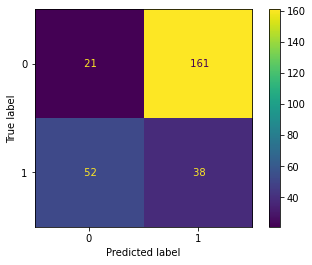

In [76]:
cm = confusion_matrix(y_val, xgb_pred, labels = xgb_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb_cv.classes_)
disp.plot(values_format = ' ')

In [77]:
xgb_prob = xgb_cv.predict_proba(x_val)

xgb_df = pd.DataFrame(xgb_prob, columns = ['HomeWinProbability', 'AwayWinProbability'])

xgb_df['HomeTeam'] = pd.Series(epl3c.loc[x_val.index, 'HomeTeam'].values)
xgb_df['AwayTeam'] = pd.Series(epl3c.loc[x_val.index, 'AwayTeam'].values)

xgb_df = xgb_df[['HomeTeam', 'AwayTeam', 'HomeWinProbability', 'AwayWinProbability']]
xgb_df.head(10)

,HomeTeam,AwayTeam,HomeWinProbability,AwayWinProbability
0,Aston Villa,Arsenal,0.711848,0.288152
1,Leeds,Man City,0.421498,0.578502
2,Burnley,West Ham,0.404926,0.595074
3,Everton,West Ham,0.728746,0.271254
4,Aston Villa,Leicester,0.361754,0.638246
5,Luton,Burnley,0.375380,0.624620
6,Crystal Palace,Chelsea,0.154707,0.845293
7,Liverpool,Man City,0.841542,0.158458
8,Southampton,Newcastle,0.010320,0.989680
9,Man United,Arsenal,0.533838,0.466162


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

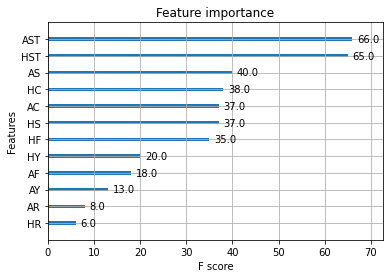

In [78]:
plot_importance(xgb_cv.best_estimator_)

In [79]:
accuracy_lg = accuracy_score(y_val, y_predlg)
precision_lg = precision_score(y_val, y_predlg)
f1_lg = f1_score(y_val, y_predlg)
recall_lg = recall_score(y_val, y_predlg)


accuracy_dt = accuracy_score(y_val, dt1_pred)
precision_dt = precision_score(y_val, dt1_pred)
f1_dt = f1_score(y_val, dt1_pred)
recall_dt = recall_score(y_val, dt1_pred)

accuracy_rf = accuracy_score(y_val, rfcv_pred)
precision_rf = precision_score(y_val, rfcv_pred)
f1_rf = f1_score(y_val, rfcv_pred)
recall_rf = recall_score(y_val, rfcv_pred)

accuracy_xgb = accuracy_score(y_val, xgb_pred)
precision_xgb = precision_score(y_val, xgb_pred)
f1_xgb = f1_score(y_val, xgb_pred)
recall_xgb = recall_score(y_val, xgb_pred)


table = {'logistic_regression': {'accuracy': accuracy_lg, 'precision': precision_lg, 'f1': f1_lg, 'recall':recall_lg},
           'decision_tree': {'accuracy': accuracy_dt, 'precision': precision_dt, 'f1': f1_dt, 'recall':recall_dt},
           'random_forest': {'accuracy': accuracy_rf, 'precision': precision_rf, 'f1': f1_rf, 'recall':recall_rf},
           'xgb': {'accuracy': accuracy_xgb, 'precision': precision_xgb, 'f1': f1_xgb, 'recall':recall_xgb},
          }

results = pd.DataFrame(table)
results.to_csv(r'C:\Users\Ayodele\Desktop\epl\results_table.csv', index = True)

In [80]:
results = pd.read_csv(r'C:\Users\Ayodele\Desktop\epl\results_table.csv')
results

,Unnamed: 0,logistic_regression,decision_tree,random_forest,xgb
0,accuracy,0.761029,0.231618,0.113971,0.216912
1,precision,0.671233,0.191710,0.112821,0.190955
2,f1,0.601227,0.261484,0.154386,0.262976
3,recall,0.544444,0.411111,0.244444,0.422222


<Axes: xlabel='metric', ylabel='value'>

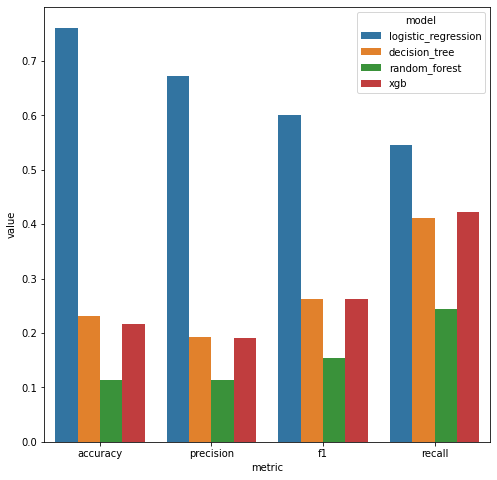

In [81]:
result = pd.DataFrame({'model': ['logistic_regression', 'logistic_regression','logistic_regression','logistic_regression',
                                'decision_tree', 'decision_tree', 'decision_tree', 'decision_tree',
                                'random_forest','random_forest','random_forest','random_forest',
                                'xgb', 'xgb', 'xgb', 'xgb'],
                      'metric': ['accuracy', 'precision', 'f1', 'recall',
                                'accuracy', 'precision', 'f1', 'recall',
                                'accuracy', 'precision', 'f1', 'recall',
                                'accuracy', 'precision', 'f1', 'recall'],
                      'value': [accuracy_lg, precision_lg, f1_lg, recall_lg,
                               accuracy_dt, precision_dt, f1_dt, recall_dt,
                               accuracy_rf, precision_rf, f1_rf, recall_rf,
                               accuracy_xgb, precision_xgb, f1_xgb, recall_xgb]})


plt.figure(figsize = (8,8))
sns.barplot(data = result, x = 'metric', y = 'value', hue = 'model')

<Axes: >

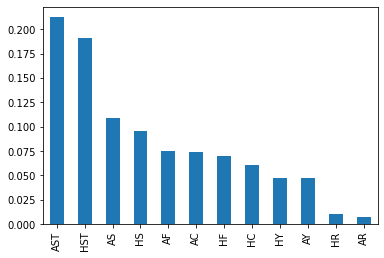

In [82]:
important = rfcv.best_estimator_.feature_importances_
rf_imp = pd.Series(important, index = x.columns).sort_values(ascending = False)
fig, ax = plt.subplots()
rf_imp.plot.bar(ax=ax)

<Axes: >

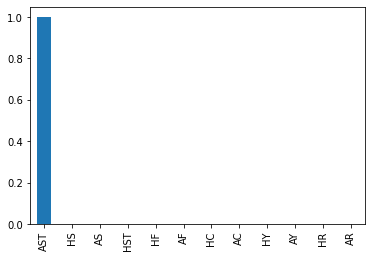

In [83]:
important = lg1.best_estimator_.feature_importances_
dt_imp = pd.Series(important, index = x.columns).sort_values(ascending = False)
fig, ax = plt.subplots()
dt_imp.plot.bar(ax=ax)

In [84]:
champion_pred = rfcv.predict(x_test)
print('accuracry score is: ', '%.4f' %accuracy_score(y_test, champion_pred))
print('precision score is: ', '%.4f' %precision_score(y_test, champion_pred))
print('f1 score is: ', '%.4f' %f1_score(y_test, champion_pred))
print('recall score is: ', '%.4f' %recall_score(y_test, champion_pred))

accuracry score is:  0.1206
precision score is:  0.1395
f1 score is:  0.1941
recall score is:  0.3186


In [85]:
rf_champ = rfcv.predict_proba(x_test)

rf_res = pd.DataFrame(rf_champ, columns = ['HomeWinProbability', 'AwayWinProbability'])

rf_res['HomeTeam'] = pd.Series(epl3c.loc[x_val.index, 'HomeTeam'].values)
rf_res['AwayTeam'] = pd.Series(epl3c.loc[x_val.index, 'AwayTeam'].values)

rf_res = rf_res[['HomeTeam', 'AwayTeam', 'HomeWinProbability', 'AwayWinProbability']]
rf_res.head(10)

,HomeTeam,AwayTeam,HomeWinProbability,AwayWinProbability
0,Aston Villa,Arsenal,0.866888,0.133112
1,Leeds,Man City,0.925155,0.074845
2,Burnley,West Ham,0.080625,0.919375
3,Everton,West Ham,0.593036,0.406964
4,Aston Villa,Leicester,0.595714,0.404286
5,Luton,Burnley,0.526711,0.473289
6,Crystal Palace,Chelsea,0.073230,0.926770
7,Liverpool,Man City,0.141870,0.858130
8,Southampton,Newcastle,0.212768,0.787232
9,Man United,Arsenal,0.144335,0.855665


In [86]:
champion_pred = xgb_cv.predict(x_test)
print('accuracry score is: ', '%.4f' %accuracy_score(y_test, champion_pred))
print('precision score is: ', '%.4f' %precision_score(y_test, champion_pred))
print('f1 score is: ', '%.4f' %f1_score(y_test, champion_pred))
print('recall score is: ', '%.4f' %recall_score(y_test, champion_pred))

accuracry score is:  0.2147
precision score is:  0.2038
f1 score is:  0.2842
recall score is:  0.4690


In [87]:
xgb_champ = xgb_cv.predict_proba(x_test)

xgb_res = pd.DataFrame(xgb_champ, columns = ['HomeWinProbability', 'AwayWinProbability'])

xgb_res['HomeTeam'] = pd.Series(epl3c.loc[x_val.index, 'HomeTeam'].values)
xgb_res['AwayTeam'] = pd.Series(epl3c.loc[x_val.index, 'AwayTeam'].values)

xgb_res = xgb_res[['HomeTeam', 'AwayTeam', 'HomeWinProbability', 'AwayWinProbability']]
xgb_res.head(10)

,HomeTeam,AwayTeam,HomeWinProbability,AwayWinProbability
0,Aston Villa,Arsenal,0.880692,0.119308
1,Leeds,Man City,0.883090,0.116910
2,Burnley,West Ham,0.045098,0.954902
3,Everton,West Ham,0.743867,0.256133
4,Aston Villa,Leicester,0.397396,0.602604
5,Luton,Burnley,0.268807,0.731193
6,Crystal Palace,Chelsea,0.109960,0.890040
7,Liverpool,Man City,0.241756,0.758244
8,Southampton,Newcastle,0.131516,0.868484
9,Man United,Arsenal,0.095777,0.904223


In [88]:
champion_pred = lg1.predict(x_test)
print('accuracry score is: ', '%.4f' %accuracy_score(y_test, champion_pred))
print('precision score is: ', '%.4f' %precision_score(y_test, champion_pred))
print('f1 score is: ', '%.4f' %f1_score(y_test, champion_pred))
print('recall score is: ', '%.4f' %recall_score(y_test, champion_pred))

accuracry score is:  0.7000
precision score is:  0.5455
f1 score is:  0.5641
recall score is:  0.5841


In [89]:
dt_champ = lg1.predict_proba(x_test)

dt_res = pd.DataFrame(dt_champ, columns = ['HomeWinProbability', 'AwayWinProbability'])

dt_res['HomeTeam'] = pd.Series(epl3c.loc[x_val.index, 'HomeTeam'].values)
dt_res['AwayTeam'] = pd.Series(epl3c.loc[x_val.index, 'AwayTeam'].values)
dt_res = dt_res[['HomeTeam', 'AwayTeam', 'HomeWinProbability', 'AwayWinProbability']]
dt_res.head(10)

,HomeTeam,AwayTeam,HomeWinProbability,AwayWinProbability
0,Aston Villa,Arsenal,0.446809,0.553191
1,Leeds,Man City,0.446809,0.553191
2,Burnley,West Ham,0.804038,0.195962
3,Everton,West Ham,0.446809,0.553191
4,Aston Villa,Leicester,0.446809,0.553191
5,Luton,Burnley,0.446809,0.553191
6,Crystal Palace,Chelsea,0.804038,0.195962
7,Liverpool,Man City,0.804038,0.195962
8,Southampton,Newcastle,0.804038,0.195962
9,Man United,Arsenal,0.804038,0.195962


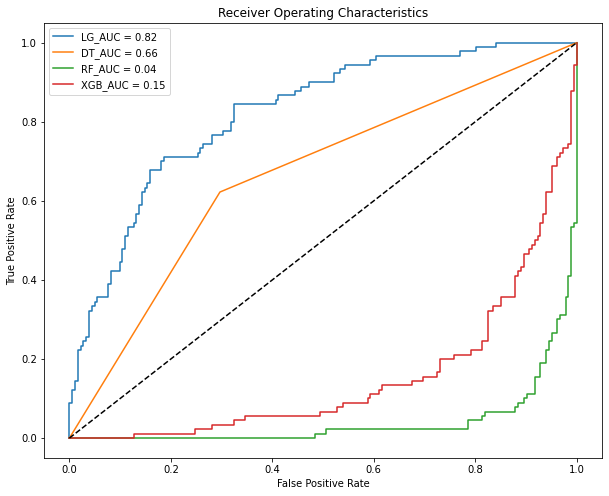

In [90]:
#roc curve
plt.figure(figsize = (10, 8))
#lg auc and roc
lg_auc = roc_auc_score(y_val, lg_pos)
lg_fpr, lg_tpr, thresholds = roc_curve(y_val, lg_pos)
plt.plot(lg_fpr, lg_tpr, label = f'LG_AUC = {lg_auc:.2f}')

#dt auc and roc
dt_auc = roc_auc_score(y_val, dt_pos)
dt_fpr, dt_tpr, thresholds = roc_curve(y_val, dt_pos)
plt.plot(dt_fpr, dt_tpr, label = f'DT_AUC = {dt_auc:.2f}')

#rf auc and roc
rf_auc = roc_auc_score(y_val, rfcv_pos)
rf_fpr, rf_tpr, thresholds = roc_curve(y_val, rfcv_pos)
plt.plot(rf_fpr, rf_tpr, label = f'RF_AUC = {rf_auc:.2f}')

#xgb auc and roc
xgb_auc = roc_auc_score(y_val, xgb_pos)
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_val, xgb_pos)
plt.plot(xgb_fpr, xgb_tpr, label = f'XGB_AUC = {xgb_auc:.2f}')


plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend()
plt.show()